In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import timeit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import warnings
import os


def training(X_train, Y_train):
        #We are going to create our machine learning models with the classifiers
        #Classifiers
        #This is a list of models and each of them is going to be a classifier
        models=[]
        models.append(("Tree",DecisionTreeClassifier()))
        models.append(("KNN",KNeighborsClassifier()))
        models.append(("LDiscrimination",LinearDiscriminantAnalysis()))
        models.append(("NB",GaussianNB()))
        models.append(("SVM",SVC(gamma="auto")))
        models.append(("LRegression",LogisticRegression(solver="liblinear",multi_class="ovr")))
        models.append(("RandomForest",RandomForestClassifier()))
        models.append(("GradientBoosting",GradientBoostingClassifier()))
        models.append(("AdaBoost",AdaBoostClassifier()))
        models.append(("XGBoost",XGBClassifier()))
        models.append(("NNet",MLPClassifier(random_state=1, max_iter=300)))
        #models.append(("OneRule",StackingClassifier()))
        #This list will accumulate the results
        results=[]
        names = []
        times=[]

        for name, model in models:
                #Normally you divide the training data in 10 blocks (or n blocks) and you use 9 for training and one
                #for testing, then you change the blocks 10 times and you choose form the 10 models that you have 
                #created the best one. This reduces overfitting
                start=timeit.default_timer()
                cv_fold= StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
                cv_results= cross_val_score(model, X_train,Y_train,cv=cv_fold, scoring="accuracy")
                model.fit(X_train,Y_train)
                stop=timeit.default_timer()
                results.append(cv_results)
                names.append(name)
                times.append(stop-start)
                print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
                print("Time: ",stop-start)
        return results, names, times,models



In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)
rIris,nIris,tIris,mIris=training(X_train,Y_train)
with open(r'classifiersNames.txt', 'w') as fp:
        for name in nIris:
                fp.write("%s\n" % name)


Tree: 0.958333 (0.055902)
Time:  0.036172959953546524
KNN: 0.975000 (0.038188)
Time:  0.04791131382808089
LDiscrimination: 0.983333 (0.033333)
Time:  0.02685832092538476
NB: 0.958333 (0.055902)
Time:  0.024285233113914728
SVM: 0.958333 (0.055902)
Time:  0.02873448235914111
LRegression: 0.950000 (0.066667)
Time:  0.030877898912876844


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecate

RandomForest: 0.941667 (0.053359)
Time:  1.2243372718803585
GradientBoosting: 0.950000 (0.055277)
Time:  2.2136162081733346


/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.9/sit

AdaBoost: 0.925000 (0.058333)
Time:  0.7506862874142826
XGBoost: 0.933333 (0.062361)
Time:  0.6466656872071326


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:

NNet: 0.983333 (0.033333)
Time:  1.2427625958807766


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


/tmp/ipykernel_28/2635415561.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=nIris)


ValueError: Dimensions of labels and X must be compatible

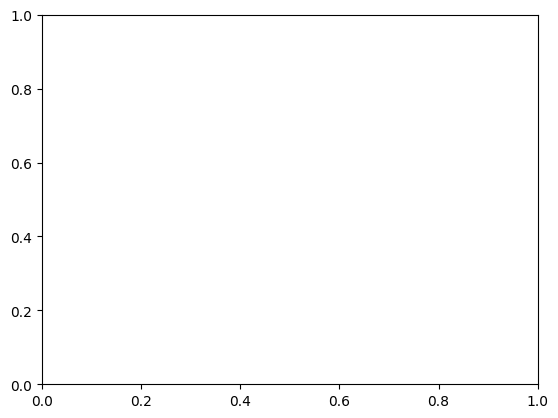

In [22]:
from matplotlib import pyplot as plt
from numpy import mean

plt.boxplot(rIris, labels=nIris)
plt.title('Algorithm Comparison')
plt.xticks(rotation=90)
plt.show()

In [3]:
#Set up for the dierctories
os.mkdir("models")
os.mkdir("results")
os.mkdir("times")

FileExistsError: [Errno 17] File exists: 'models'

In [4]:
for i,model in enumerate(mIris):
       pickle.dump(model, open('models/Iris_model_'+nIris[i], 'wb'))
       pickle.dump(rIris[i], open('results/Iris_results_'+nIris[i], 'wb'))
       pickle.dump(tIris[i], open('times/Iris_times_'+nIris[i], 'wb'))


In [12]:
for model in mIris:
    predictions=model[1].predict(X_test)
    print(str(model[0]) + ": " + str(sum(predictions == Y_test)/len(Y_test)))

Tree: 1.0
KNN: 0.9666666666666667
LDiscrimination: 0.9666666666666667
NB: 0.9666666666666667
SVM: 1.0
LRegression: 1.0
RandomForest: 0.9666666666666667
GradientBoosting: 0.9666666666666667
AdaBoost: 0.9666666666666667
XGBoost: 1.0
NNet: 0.9666666666666667


In [13]:
print(predictions)
print(Y_test)

[2 0 0 1 0 1 0 0 0 2 0 2 1 0 1 1 0 2 2 1 0 2 2 0 2 2 0 2 1 2]
[2 0 0 1 0 1 0 0 0 2 0 2 1 0 1 1 0 2 2 1 0 2 2 0 1 2 0 2 1 2]
